# Derivatives Analytics - Introduction to Object Oriented Programming

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#summary)

1. [Introduction to dates management: `datetime` module](#datetime)
2. [Non-financial Introduction to OOP](#non-financial-introduction-to-oop)\
    2.1. [Without OOP: a person](#nonoopperson)\
    2.2. [With OOP: the `Person` class](#oopperson)
3. [Introduction to OOP: Black-Scholes option pricer](#BS-option-pricer)\
    3.1. [Without OOP: a call priced using Black-Scholes model](#nonoopbs)\
    3.2. [With OOP: the `CallOption` class](#oopbs)\
    3.3. [Encapsulation: name hiding, getters and setters](#encapsulation)
4. [Including put options: the `PlainVanillaOption` class](#PlainVanillaOption) \
    4.1 [_Focus on:_ effect of interest rates on options limits](#shortRateEffect) 

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Chapter 6 Object-Oriented Programming.  From Appendix A _Dates and Times:_ Section "Python".


- [Object-Oriented Programming in Python](https://python-textbok.readthedocs.io/en/1.0/index.html): Section [Classes](https://python-textbok.readthedocs.io/en/1.0/Classes.html)

# Executive Summary <a name="executive-summary"></a>

In this notebook we gently introduce Object-Oriented Programming. We first make a non-financial example, developing the intuition behind the need of a change of programming paradigm to be able to cohordinate together different pieces of code. Once we have established the intuition, we then leverage on some basic financial knowledge to develop a Black-Scholes pricer for call options, first, and then a more general pricer for plain-vanilla put options as well. 

The following sections are organized as follows:

- In Sec. [1](#datetime) we introduce the `datetime` module, which allow us to easily manage dates.
- In Sec. [2](#non-financial-introduction-to-oop) we develop intuition using a non financial example.
- In Sec. [3](#BS-option-pricer) we apply the OOP paradygm to price call options under the Black-Scholes model.
- In Sec. [4](#PlainVanillaOption) we extend our pricer to price put options too, defining a more general class for plain-vanilla options.

These are the basic imports

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# 1. Introduction to dates management: `datetime` module <a name="datetime"></a>

The [`datetime` module](https://docs.python.org/3/library/datetime.html?highlight=strptime#module-datetime), part of the Python standard library, allows you to manage dates in your code with ease. We start importing it and giving it the alias `dt`

In [2]:
# for date management
import datetime as dt

Today's date? No problem

In [3]:
today = dt.datetime.today()
today

datetime.datetime(2020, 5, 1, 16, 50, 35, 325577)

Dates in `datetime` module are objects of [`datetime.datetime` data-type](https://docs.python.org/3/library/datetime.html#datetime-objects)

In [4]:
type(today)

datetime.datetime

You can specify a date providing year, month and day for that date

In [5]:
my_birthday = dt.datetime(year=1988,month=6,day=1)
my_birthday

datetime.datetime(1988, 6, 1, 0, 0)

In [6]:
type(my_birthday)

datetime.datetime

Distance with dates is just the difference of the two dates

In [7]:
time_to_date = today - my_birthday
time_to_date

datetime.timedelta(days=11657, seconds=60635, microseconds=325577)

which returns an object of [`datetime.timedelta` data-type](https://docs.python.org/3/library/datetime.html?highlight=timedelta#datetime.timedelta)

In [8]:
type(time_to_date)

datetime.timedelta

From `timedelta` objects you can get the number of elapsed days

In [9]:
time_to_date.days

11657

and manipulate them to get number of years elapsed. We'll see this applied extensively to compute the time-to-maturity of an option.

In [10]:
time_to_date.days/365

31.936986301369863

Often you - either input or read from file - dates which are syntactically Python Strings

In [11]:
date_string = "18-04-2020"
date_string

'18-04-2020'

In [12]:
type(date_string)

str

A good to know built-in function is the [`isinstance` function](https://docs.python.org/3/library/functions.html#isinstance)

```python
isinstance(variable, data_type)
```

which returns `True` if `variable` is of type `data_type` and `False` otherwise

In [13]:
isinstance(date_string, str)

True

You can convert a date String into a proper `datetime.datetime` object using the [`strptime` function](https://docs.python.org/3/library/datetime.html?highlight=strptime#strftime-and-strptime-behavior)

In [14]:
date = dt.datetime.strptime(date_string, "%d-%m-%Y")
date

datetime.datetime(2020, 4, 18, 0, 0)

where the `"%d-%m-%Y"` format String is used to specify how to interpret the characters in `date_string` Strings: here as day-month-Year String

In [15]:
type(date)

datetime.datetime

In [16]:
isinstance(date, dt.datetime)

True

The other way around, you can convert a `datetime.datetime` object into its String representation calling the [`strftime` function](https://docs.python.org/3/library/datetime.html?highlight=strptime#strftime-and-strptime-behavior)

In [17]:
date_string_from_dt = date.strftime("%d-%m-%Y")
date_string_from_dt

'18-04-2020'

where the `"%d-%m-%Y"` format String is used to specify how the output `date_string_from_dt` should represent the original `date` object: here as day-month-Year String.

In [18]:
date.strftime("%Y-%m-%d")

'2020-04-18'

In [19]:
type(date_string_from_dt)

str

In [20]:
isinstance(date_string_from_dt, str)

True

An alternative choice could be `"%Y-%m-%d"` for Year-month-day output format.

In [21]:
date.strftime("%d-%m-%Y")

'18-04-2020'

You can add a certain amount of days to a given date adding a `datetime.timedelta` object to a `datetime.datetime` date

In [22]:
date + dt.timedelta(days=25)

datetime.datetime(2020, 5, 13, 0, 0)

# 2. Non-financial Introduction to OOP <a name="non-financial-introduction-to-oop"></a>

We begin with a non-financial example. We define a _person._ 

We start describing its properties (name, surname etc.) and the things that a person could usually do knowing and/or using his/her properties (e.g. knowing his/her he/she can say it).

We start defining these features one by one in a _sequential_ way, noticing that there is no cohordination between the properties defining the person and the actions he/she can take knowing/using the properties. There is no logical consistency. 

Finally, we define a logic entity - synctactically a `Person` Python class - which logically describes the abstract concept of _person_ and that is able to cohordinate between the properties defining the person and the things that a person can do knowing and/or using his/her properties.

## 2.1. Without OOP: a person <a name="nonoopperson"></a> 

Knowing name and surname, a person can usually say it. We implement this action as the `say_your_name()` function, whih needs in input the name and surname of our person

In [23]:
def say_your_name(name, surname):
    print("My name is {} {}".format(name, surname))

In [24]:
my_name = "Gabriele"
my_surname = "Pompa"

In [25]:
say_your_name(name=my_name, surname=my_surname)

My name is Gabriele Pompa


We can also make this person declaring his/her country of birth

In [26]:
def say_country_of_birth(country):
    print("My country of birth is {}".format(country))

In [27]:
my_country = "Italy"

In [28]:
say_country_of_birth(my_country)

My country of birth is Italy


From a birthdate String, we can use the functionalities of `datetime` module to compute person's age

In [29]:
def compute_age(birthdate):
    
    today = dt.datetime.today()  
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    if today >= next_birthday:
        age = today.year - birthdate.year
    else:
        age = today.year - birthdate.year - 1
        
    return age

notice the use of `next_birthday` to check whether in the current year person's birthday is already occurred or not yet.

In [30]:
my_birthdate = "01-06-1988"
my_birthdate

'01-06-1988'

In [31]:
my_age = compute_age(birthdate=my_birthdate)
my_age

31

Accordingly we can compute the number of days left to his/her next birthday

In [32]:
def time_to_birthday(birthdate):
    
    today = dt.datetime.today()
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    return (next_birthday - today).days

In [33]:
days_to_birthday = time_to_birthday(my_birthdate)
days_to_birthday

30

One think we should notice here is that any time we want to make the person do something (e.g. say his/her name), we need to provide explicitly all the required informations in input. Each time. 

There is no way to guarantee that `my_name`, `my_surname`, `my_birthdate` (and thus `my_age`) actually belong to the same person. Those are just variables that we declare one-by-one. We have in mind the fact that they describe different properties of the same person, but there is no way to inform Python of this relationship. In other words, there is no way to cohordinate logically between the different data used by the functions we defined...

## 2.2. With OOP: the `Person` class <a name="oopperson"></a> 

Classes are a way of grouping together related data and functions which act upon that data. They define the logical model according to which data and functions working on those data should cohordinate.

Here we define the concept of a person as a `Person` class. In Python classes are declared using the `class` keyword,  followed by the class name and a colon.

The variables `name`, `surname`, `country` etc. are called _attributes_ of the `Person` class:
- are the set of informations in common to all the persons;
- are the data used by the `Person` class to do things. 

Functions defined within the class, like `say_your_name()`, `say_country_of_birth()`, `compute_age()` and `time_to_birthday()`, are called _methods_ of the `Person` class: 
- define the range of things that a class can do using its own attributes (and, possibly, other parameters coming from outside the class).

In [34]:
class Person:
    """
    Person class implementing some typical features of a person.
    
    Attributes:
    -----------
        name (str):                   name string;
        surname (str):                surname string;
        country (str):                country of birth;
        birthdate (str; dt.datetime): date of birth. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        age (int):                    age, as computed by compute_age() method.
    
    Methods:
    --------
        say_your_name: (returns) None
            Prints name and surname.
            
        say_country_of_birth: None
            Prints country of birth.
            
        compute_age: int
            Computes the age, sets self.age attribute and returns it.
            
        time_to_birthday: int
            Computes the number of days left untill next birthdat and return the number.
    
    """
    # MIND THE INDENTATION!!!
    def __init__(self, p_name, p_surname, p_country, p_birthdate):
        self.name      = p_name
        self.surname   = p_surname
        self.country   = p_country
        self.birthdate = dt.datetime.strptime(p_birthdate, "%d-%m-%Y") if isinstance(p_birthdate, str) else p_birthdate
        self.age       = None
    
    def say_your_name(self):
        print("My name is {} {}".format(self.name, self.surname))
        
    def say_country_of_birth(self):
        print("My country of birth is {}".format(self.country))
        
    def compute_age(self):
    
        today = dt.datetime.today()  

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        if today >= next_birthday:
            self.age = today.year - self.birthdate.year
        else:
            self.age = today.year - self.birthdate.year - 1

        return self.age 
    
    def time_to_birthday(self):

        today = dt.datetime.today()

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        return (next_birthday - today).days

Once we have a logical model for a concept, say the concept of a _person_ defined as a `Person` class, we can start making concrete examples from this abstract model. For example, Bill Gates is a person. Mario Draghi is another person.

These concrete examples from the person concept
- all conform to the logic model defined by the class; 
- are _instances_ of the `Person` class;
- are called _objects_ (of the `Person` class).

The programming style of modeling abstract concepts as _classes_ and concrete instances as _objects_ is called [_Object-Oriented Programming_](https://en.wikipedia.org/wiki/Object-oriented_programming) (OOP in short).

Let's define myself as an instance of the `Person` class

In [35]:
gab = Person(p_name = "Gabriele", 
             p_surname = "Pompa", 
             p_country = "Italy", 
             p_birthdate = "01-06-1988")

We say that `gab` is an object ot class `Person`.

When you can create an instance of the `Person` class: 

- the special `__init__()` method is called, taking in input the parameters (if any) required to instantiate the attribute of the `Person`. Here the value of `p_name` parameter is assigned to `name` attribute, `p_surname` to `surname` etc.  


- the `__init__()` method is usually called the class' _constructor_ (or _initializer_ ).

Notice the special keyword `self`:

- `self` stands for _this object itself_ - like object `gab` itself;  


- `self` is used as `self.attribute` and `self.method(...)` to specify that we are refferring to that particular object's attribute and method, respectively.


- `self` is the first parameter of each method definition - like `def method(self, ...)` - and informs the interpreter that - whenever that method will be called - the object itself will be passed to that method;


- when you call that method - like `self.method(...)` within class definition -  `self` is not an input parameter you provide explicitly; 




Classes provide an analogy with data-types, such that each class defines its own - user defined - data-type and, then, on each object variable of the class we can call the `type(object)` function - as we would do with Integers, Floats, Strings, etc. - which returns the kind of data-type of that object, that is, the data-type defined by the class we have created. 

In [36]:
type(gab)

__main__.Person

Which is the name of object `gab`? It's his/her `name` attribute. We can access it using the `.` access operator.

In [37]:
gab.name

'Gabriele'

Python knows that `gab.name` refers to the `name` attribute of object `gab`, thanks to the use of the `self` in the attribute definition (`self.name`), which informs that we are referring to the `.name` attribute of the calling `gab` object itself. 

With time this way of reasoning will come automatic. Dont't worry.

In [38]:
gab.surname

'Pompa'

We can make object `gab` saying his name

In [39]:
gab.say_your_name()

My name is Gabriele Pompa


notice that `say_your_name()` doesn't need any input parameter because it is a method of `gab` object. Therefore, the `self.name` and `self.surname` it uses will be `gab.name` and `gab.surname`, respectively.

This way of reasoning applies to all the other methods and attributes

In [40]:
gab.country

'Italy'

In [41]:
gab.say_country_of_birth()

My country of birth is Italy


In [42]:
gab.birthdate

datetime.datetime(1988, 6, 1, 0, 0)

In [43]:
gab.birthdate.strftime("%d-%m-%Y")

'01-06-1988'

When we instantiate `gab` object, his `age` attribute is left unspecified. We conventionally set it to `None` in the `__init__`

In [44]:
gab.age is None

True

we delegate to the `compute_age()` function the initialization of the `age` parameter

In [45]:
gab.compute_age()

31

now `age` is specified

In [46]:
gab.age

31

In [47]:
gab.time_to_birthday()

30

**TAKE-HOME MESSAGE**: what's crucial to understand in all of this is that:

- classes provide a logical schema that cohordinates between its data (attributes) and functions (methods), allowing them to work together.

- once we have isntantiated an object, We don't need to provide data explicitly to its methods to call them, because data on which the method works are its own attributes.

Here is another instance of the `Person` class. We instantiate a `bill` object.

In [48]:
bill = Person(p_name = "Bill", 
              p_surname = "Gates", 
              p_country = "USA", 
              p_birthdate = "28-10-1955")

In [49]:
type(bill)

__main__.Person

In [50]:
bill.say_your_name()

My name is Bill Gates


Notice that both `gab` and `bill` share the same data-type

In [51]:
type(gab)

__main__.Person

in the same way as two different Float variables share the data-type

In [52]:
p = 1.5

In [53]:
q = 0.2

In [54]:
type(p)

float

In [55]:
type(q)

float

# 3. Introduction to OOP: Black-Scholes option pricer <a name="BS-option-pricer"></a>

We now see a concrete application of the OOP paradygm: we build a pricer for an european call option according to the Black-Scholes(-Merton) model. For theoretical background (an notation) we refer to [_Financial Modeling 1_ lecture notes](https://finmod1.wordpress.com/lecture-notes/) from Professor Pacati.

As before, we start with a non-OOP implementation, notice the intrinsic lack of cohordination between parts of the code and then model the pricer as a `CallOption` class, which is able to cohordinates model and market data with outputs. 

## 3.1. Without OOP: a call priced using Black-Scholes model <a name="nonoopbs"></a> 

A call option of maturity $T$ and strike $K$ on an asset $S$ is a contract giving to the owner the right to buy for $K$ the asset at the future date $T$ (when the asset will be worth $S_T$). The payoff of the call option contract at time $T$ is then

$$
\max(S_T - K, 0)
$$

We corrispondigly define the `call_option_payoff()` function

In [56]:
def call_option_payoff(S,K):
    """
    call_option_payoff(S,K) computes returns the payoff of a call option given the spot price of the underlying asset 
    and strike price 'K'.
    
    Parameters:
        S (float): spot price of the underlying asset;
        K (float): strike price;
    
    Returns:
        payoff (float): call option payoff;
    """
    return max(0.0, S - K)


We consider non-dividend paying underlying asset $S$. At any time $t \leq T$, the price $c_t$ of the european call option under the Black-Scholes model is given by

$$
c_t = S_t N(d_1) - K e^{-r \tau} N(d_2)
$$

where $\tau = T-t$ is the option time-to-maturity, $r$ is the continuously compounding short-rate, $N(z)$ is the cumulative distribution function of a standard normal random variable 

$$
N(z) = \frac{1}{\sqrt{2 \pi}} \int^{z}_{- \infty} e^{-\frac{z^2}{2}}
$$

and the to arguments of $N(z)$ are

\begin{equation}
\begin{aligned}
d_1 &= \frac{\log{\frac{S_t}{K}} + \left( r + \frac{1}{2} \sigma^2 \right) \tau }{\sigma \sqrt{\tau}} \nonumber \\
d_2 &= d_1 - \sigma \sqrt{\tau}
\end{aligned}
\end{equation}

We corrispondigly define the `call_option_price()` function, which uses the `stats.norm.cdf` function to implement $N(z)$

In [57]:
def call_option_price(S, K, tau, r, sigma):
    """
    call_option_price(S, K, tau, r, sigma) computes and returns the exact price of a call option 
    of time to maturity 'tau' and strike price 'K' given the spot price of the underlying asset 'S', 
    the continuosly compounded short-rate 'r' and volatility of the 
    underlying asset 'sigma'.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        sigma (float): volatility of underlying asset;
        
    Returns:
        price (float): call price;

    """
    
    if S == 0: # this is to avoid log(0) issues
        return 0.0
    elif tau == 0: # this is to avoid 0/0 issues
        return call_option_payoff(S, K)
    else:
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
        d2 = d1 - sigma * np.sqrt(tau)

        price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price

Independently from the valuation model used to price the option (we assume constant deterministic short-rate $r$ here and everywhere in this notebook), there are non-arbitrage arguments leading to upper and lower limits for the price of the european call options. At any time $t \leq T$, the price $c_t$ of the option satisfies:

$$
\max(S_t - K e^{-r \tau}, 0) \leq c_t \leq S_t
$$

See, for example, [John C. Hull _Options, Futures and Other Derivatives_ (10th ed)](https://www.pearson.com/us/higher-education/program/Hull-Options-Futures-and-Other-Derivatives-10th-Edition/PGM333301.html) chapter 11.3.

We corrispondigly define `call_lower_limit()` and `call_upper_limit()` functions

In [58]:
def call_upper_limit(S):
    """
    call_upper_limit(S) returns the upper limit for a vanilla call option price, 
    which coincides with the spot price of the underlying asset.

    Parameters:
        S (float):     spot price of the underlying asset;
        
    Returns:
        S (float):     spot price of the underlying asset;

    """
    
    return S

In [59]:
def call_lower_limit(S, K, tau, r):
    """
    call_lower_limit(S, K, tau, r) returns the lower limit for a vanilla call option price.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        
    Returns:
        price_lower_limit (float): call lower limit price;

    """
    
    price_lower_limit = max(S - K*np.exp(-short_rate * tau), 0)
    
    return price_lower_limit

To visualize the price, we define a couple of plotting functions.

In [60]:
K              = 100.0
short_rate     = 0.05 # 5% per year
volatility     = 0.2  # 20% per year

In [61]:
S_strip = np.linspace(80, 120, 100)
S_strip = np.append(S_strip, K)
S_strip = np.sort(S_strip)
S_strip

array([ 80.        ,  80.4040404 ,  80.80808081,  81.21212121,
        81.61616162,  82.02020202,  82.42424242,  82.82828283,
        83.23232323,  83.63636364,  84.04040404,  84.44444444,
        84.84848485,  85.25252525,  85.65656566,  86.06060606,
        86.46464646,  86.86868687,  87.27272727,  87.67676768,
        88.08080808,  88.48484848,  88.88888889,  89.29292929,
        89.6969697 ,  90.1010101 ,  90.50505051,  90.90909091,
        91.31313131,  91.71717172,  92.12121212,  92.52525253,
        92.92929293,  93.33333333,  93.73737374,  94.14141414,
        94.54545455,  94.94949495,  95.35353535,  95.75757576,
        96.16161616,  96.56565657,  96.96969697,  97.37373737,
        97.77777778,  98.18181818,  98.58585859,  98.98989899,
        99.39393939,  99.7979798 , 100.        , 100.2020202 ,
       100.60606061, 101.01010101, 101.41414141, 101.81818182,
       102.22222222, 102.62626263, 103.03030303, 103.43434343,
       103.83838384, 104.24242424, 104.64646465, 105.05

In [62]:
tau_strip = np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
tau_strip

array([0.05, 0.1 , 0.25, 0.5 , 0.75, 1.  ])

In [63]:
def plot_multi_tau(S_list, K, tau_list, r, sigma):
    """
    plot_multi_tau(S_list, tau_list) plot call option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        S_list (np.ndarray):   list of underlying values;
        K (float):             strike price
        tau_list (np.ndarray): list of times to maturity (in years);
        r (float):             continuously compounded short-rate;
        sigma (float):         volatility of underlying asset;
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity 
    for tau in np.flip(tau_list):
        ax.plot(S_list, [call_option_price(S, K, tau, r, sigma) for S in S_list], 
                '-', lw=1.5, label=r"$\tau={}$".format(tau))

    # plot the red payoff line for different underlying values
    ax.plot(S_list, [call_option_payoff(S, K) for S in S_list], 
            'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(K, r*100, sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

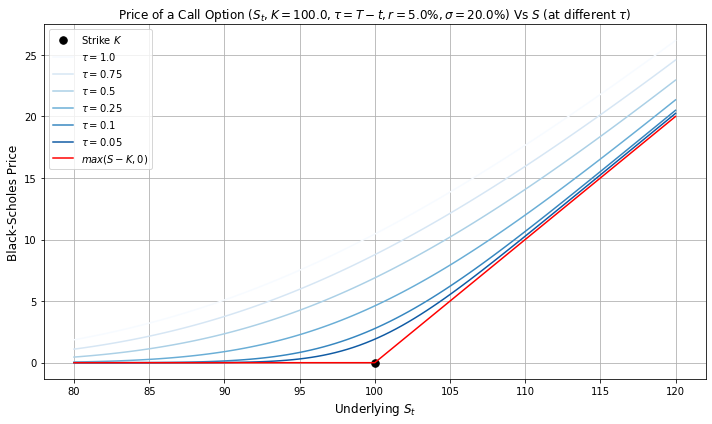

In [64]:
plot_multi_tau(S_strip, K, tau_strip, short_rate, volatility)

This plot shows the price $c_t$ of a $(K, \tau=T-t)$ call option contract for different levels $S_t$ of the underlying asset value (that is, in different market environments) at several times-to-maturity $\tau$.  The red payoff line is reported for reference. We can notice that:

- the longer is the time-to-maturity $\tau$ of the option, the more the option is expensive;

- the more the option approaches expiration ($\tau \rightarrow 0$), the more its price approaches the payoff line. 

In [65]:
tau = 2.0

K_focus = 5

S_strip_focus = np.linspace(0, 10, 100)
S_strip_focus = np.append(S_strip_focus, K_focus)
S_strip_focus = np.sort(S_strip_focus)
S_strip_focus

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.        ,  5.05050505,  5.15151515,  5.25252525,  5.35353535,
        5.45454545,  5.55555556,  5.65656566,  5.75757576,  5.85858586,
        5.95959596,  6.06060606,  6.16161616,  6.26262626,  6.36363636,
        6.46464646,  6.56565657,  6.66666667,  6.76767677,  6.86

In [66]:
def plot_single_tau(S_list, K, tau, r, sigma):
    """
    plot_single_tau(S_list, tau_strip) plot call option prices for underlying in 'S_list' at time to maturity 'tau'.

    Parameters:
        S_list (List): list of underlying values;
        K (float):     strike price
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        sigma (float): volatility of underlying asset;
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, price, lower limit for different underlying values
    ax.plot(S_list, [call_upper_limit(S) for S in S_list],                    
            'k-.', lw=1.5, label=r"Upper limit: $S_t$")
    ax.plot(S_list, [call_option_price(S, K, tau, r, sigma) for S in S_list], 
            'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, [call_lower_limit(S, K, tau, short_rate) for S in S_list], 
            'k--', lw=1.5, label=r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$")

    # plot the red payoff line for different underlying values
    ax.plot(S_list, [call_option_payoff(S, K) for S in S_list], 
            'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(K, tau, r*100, sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

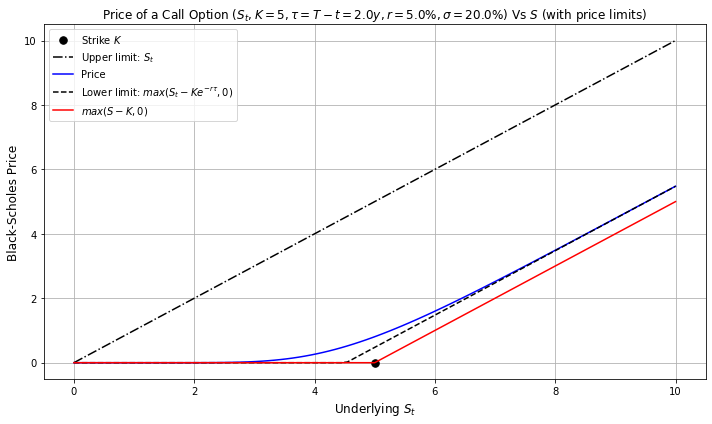

In [67]:
plot_single_tau(S_strip_focus, K_focus, tau, short_rate, volatility)

This plot shows the price $c_t$ of a $(K, \tau)$ call option contract for different levels $S_t$ of the underlying asset value (that is, in different market environments). For reference, we report:

- the red payoff line;

- the upper bound $c_t \leq S_t$;

- the lower bound $c_t \geq \max(S_t - K e^{-r \tau}, 0)$;

## 3.2. With OOP: the `CallOption` class <a name="oopbs"></a> 

We now group together all the parameters needed to define a call option, together with its payoff, price and bounds in a logical consistent way: we define a `CallOption` class.

The class has, as attributes:

- the underlying asset value $S_t$ at time $t$;
- the strike price $K$;
- the option valuation date $t$;
- the option expiration date $T$;
- the time-to-maturity of the options $\tau=T-t$;
- the short rate $r$;
- the volatility of the underlying asset $\sigma$;

and, as methods:

- the payoff `payoff`;

- the `price_upper_limit` and `price_lower_limit`;

- the `price`

Notice that each method is defined in exactly the same way as the corresponding function in the previous section. The crucial difference is that - being methods of `CallOption` class, they do not need input parameters, as they can access directly to `CallOption` attributes.

In [68]:
class CallOption:
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------                        
        payoff: float
            Computes the payoff of the option and returns it
            
        price_upper_limit: float 
            Returns the upper limit for a vanilla call option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla call option price.

        price: float
            Computes the exact price of the option and returns it

    """
    
    # constructor
    def __init__(self, S_t, K, t, T, r, sigma):
        self.S     = S_t
        self.K     = K
        self.t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.tau   = self.__time_to_maturity()
        self.r     = r
        self.sigma = sigma
        
    # string representation
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.S, self.K, self.t.strftime("%d-%m-%Y"), self.T.strftime("%d-%m-%Y"), self.tau, 
                       self.r*100, self.sigma*100)
      
    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.T - self.t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.S - self.K)
    
    # upper price limit
    def price_upper_limit(self):
        return self.S

    # lower price limit
    def price_lower_limit(self):
        return max(self.S - self.K*np.exp(-self.r * self.tau), 0)

    # price calculation
    def price(self):
        
        if self.S == 0: # this is to avoid log(0) issues
            return 0.0
        elif self.tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()        
        else:

            d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.tau) / (self.sigma * np.sqrt(self.tau))
            d2 = d1 - self.sigma * np.sqrt(self.tau)

            price = self.S * stats.norm.cdf(d1, 0.0, 1.0) - self.K * np.exp(-self.r * self.tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price    

We can instantiate a `call` object

In [69]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

Notice that we defined the special `__repr__` method. This special method is actually provided by default by Python anytime you define a class and it provides the string representation of the class: simply how it should be printed on screen. We simply re-define it (aka _override_ ) to give a more informative representation

In [70]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [71]:
type(call)

__main__.CallOption

Using the `.` access operator, we can inspect the `call` attributes

In [72]:
call.S

90.0

In [73]:
call.K

100.0

In [74]:
call.T

datetime.datetime(2020, 12, 31, 0, 0)

In [75]:
call.tau

0.7013698630136986

and we can call its methods

In [76]:
call.payoff()

0.0

In [77]:
call.price()

3.487402470943657

In [78]:
call.price_upper_limit()

90.0

In [79]:
call.price_lower_limit()

0

we can test the consistency of `price_lower_limit()`

In [80]:
max(call.S - call.K*np.exp(-call.r * call.tau), 0)

0

We can visualize again our option price modifying our plotting functions: we pass in input an `option` object, so that we can use its attributes and methods in the `plot_multi_tau()` (and `plot_single_tau()`) function body.

In [81]:
def plot_multi_tau(option, S_list, tau_list):
    """
    plot_multi_tau(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau_list (List):     list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(option.K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.tau = tau_list[i] # reset of time-to-maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.S = S_list[j] # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.tau))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.S = S_list[i] # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.K, option.r, option.sigma), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

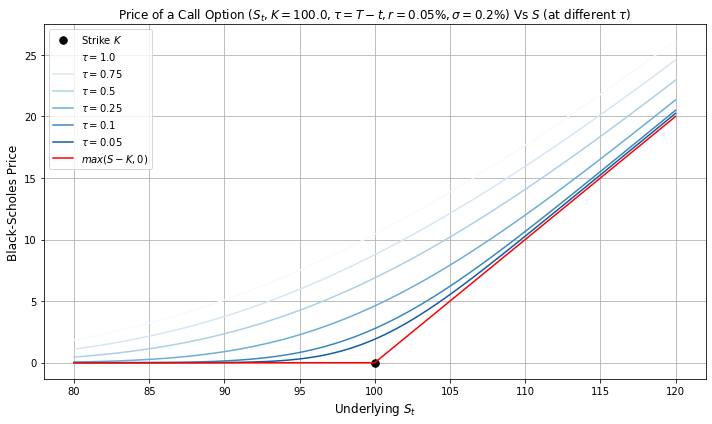

In [82]:
plot_multi_tau(call, S_strip, tau_strip)

In [83]:
def plot_single_tau(option, S_list, tau):
    """
    plot_single_tau(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau (float):         time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # setting legend labels
    upper_limit_label = r"Upper limit: $S_t$"
    payoff_label      =r"$max(S-K, 0)$"
    lower_limit_label = r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
        
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.S = S_list[i] # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=upper_limit_label)
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=lower_limit_label)
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=payoff_label)

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.K, option.tau, option.r*100, option.sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [84]:
call_focus = CallOption(S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

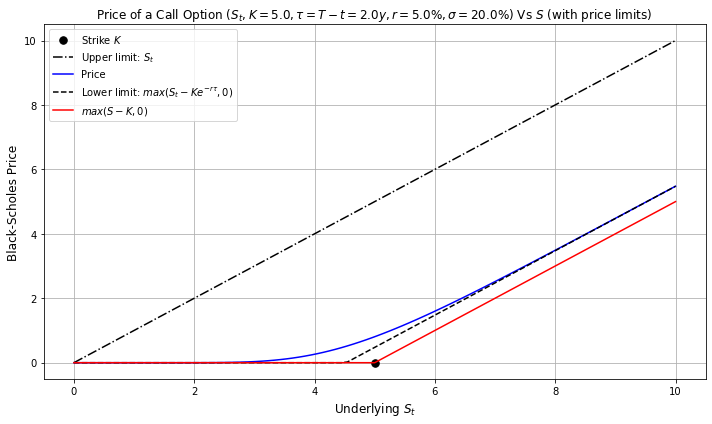

In [85]:
plot_single_tau(call_focus, S_strip_focus, call_focus.tau)

## 3.3. Encapsulation: name hiding, getters and setters <a name="encapsulation"></a> 

In plotters `S` and `tau` attributes have been intentionally changed. But this might be something which is error prone. You may unintentionally change an attribute value and then not being able to understand the behavior of your class anymore.

The solution to this issue is based on the concept of _encapsulation._ The idea is simple: 

- Hide the attributes to the outside of the class (that is, do not make them accessible). This is done prepending an attribute name with `__`. `__AttributeName` attribute is called _private_ attribute. For example:

  - change underlying attribute from `self.S` to `self.__S`;
  
  - From outside of the class you cannot access `S` anymore, neither as `call.S`, nor as `call.__S`;
  
  - this way there is no risk to unintentionally change its vlaue.


- Provide, if you want, _getters_ methods to retrieve the value of an attribute from outside the class. For example: 
  
  - you make attribute `S` accessible from outise through getter method `get_S()` which returns the current value of the attribute.


- Provide, if you want, _setters_ methods to set an attribute from outside the class. For example:
 
 - you allow to set attribute `S` to a new value, through the setter method `set_S(new_value)` which sets `S` to `new_value`.
  

The naming convention 

- `get_AttributeName()`

- `set_AttributeName(new_value)`

is standard and should be followed.

In [86]:
class CallOption:
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------            
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla call option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla call option price.
            
        price: float
            Computes the exact price of the option and returns it

    """
    
    def __init__(self, S_t, K, t, T, r, sigma):
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    # setters
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.get_S() - self.get_K())

    # upper price limit
    def price_upper_limit(self):
        return self.get_S()

    # lower price limit
    def price_lower_limit(self):
        return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
    
    # price calculation
    def price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        tau = self.get_tau()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price    

Notice that we can use getters also from inside the class: this is a good idea, since we are sure that if there is an error with the value of `S` attribute somewhere in the class, then we know we should be looking directly at `get_S()` method.

In [87]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [88]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [89]:
type(call)

__main__.CallOption

In [90]:
isinstance(call, CallOption)

True

Notice that having defined `self.__S` for underlying asset value attribute, hides it from exterior

In [91]:
# Raises: AttributeError: 'CallOption' object has no attribute '__S'
#
#call.__S

you can instead use the corresponding getter to retrieve the value

In [92]:
call.get_S()

90.0

and the corresponding setter to set it

In [93]:
call.set_S(105)

Notice how now the value is changed

In [94]:
call.get_S()

105

Similarly for other attributes

In [95]:
call.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [96]:
call.get_T()

datetime.datetime(2020, 12, 31, 0, 0)

In [97]:
call.get_tau()

0.7013698630136986

Notice that, for internal consistency:

- when we change the valuation date $t$ (`set_t()`) or the expiration date $T$ (`set_T()`) of the option, then we automatically update the time-to-maturity $\tau=T-t$ with the `__update_tau()` method;

- when we update the time-to-maturity $\tau$ of the options, then we automatically chose to extend or anticipate the expiration date $T$ with the `__update_T()`. 

In the same way we define private attributes as `__AttributeName`, we can define _private_ methods as `__MethodName()`. Private methods cannot be called from outside the class. Examples: 
- `__update_tau()`,

- `__update_T()`,

- `__time_to_maturity()`

In [98]:
call.set_t("01-06-2020")

In [99]:
call.get_t()

datetime.datetime(2020, 6, 1, 0, 0)

In [100]:
# Raises: AttributeError: 'CallOption' object has no attribute '__update_tau'
#
# call.__update_tau()

In [101]:
call.get_tau() # tau gets updated automatically

0.5835616438356165

In [102]:
(call.get_T() - call.get_t()).days / 365 # consistency check

0.5835616438356165

In [103]:
call.set_tau(1.0)

In [104]:
call.get_tau()

1.0

In [105]:
# Raises: AttributeError: 'CallOption' object has no attribute '__update_T'
#
# call.__update_T()

In [106]:
call.get_T() # expiration date gets updated automatically

datetime.datetime(2021, 6, 1, 0, 0)

In [107]:
(call.get_T() - call.get_t()).days / 365 # consistency check

1.0

In [108]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [109]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

Here we use getters and setters in our plotting example

In [110]:
def plot_multi_tau(option, S_list, tau_list):
    """
    plot_multi_tau(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau_list (List):     list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i]) # reset the time to maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

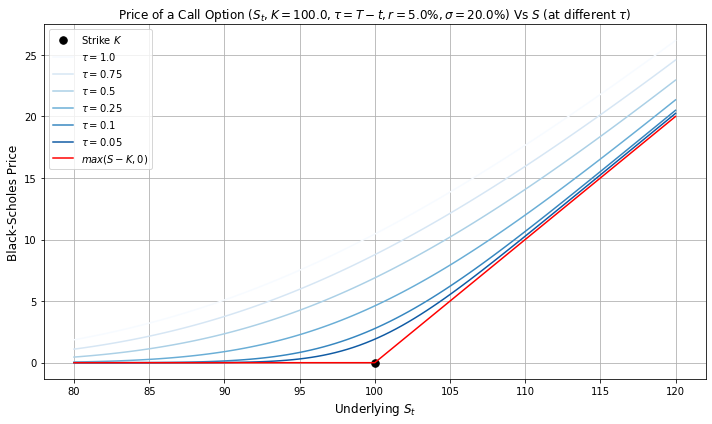

In [111]:
plot_multi_tau(call, S_strip, tau_strip)

In [112]:
def plot_single_tau(option, S_list, tau):
    """
    plot_single_tau(option, S_list, tau_list) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau (float):         time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # setting legend labels
    upper_limit_label = r"Upper limit: $S_t$"
    payoff_label      =r"$max(S - K, 0)$"
    lower_limit_label = r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
        
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=upper_limit_label)
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=lower_limit_label)
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=payoff_label)

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.get_K(), option.get_tau(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [113]:
call_focus = CallOption(S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

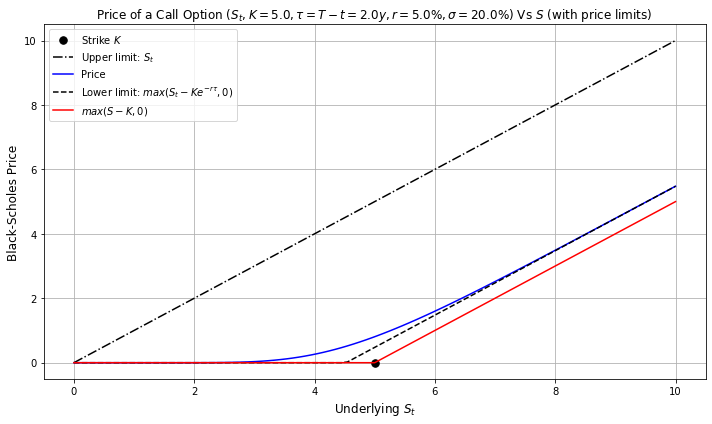

In [114]:
plot_single_tau(call_focus, S_strip_focus, call_focus.get_tau())

# 4. Including put options: the `PlainVanillaOption` class <a name="PlainVanillaOption"></a> 

A put option of maturity $T$ and strike $K$ on an asset $S$ is a contract giving to the owner the right to sell for $K$ the asset at the future date $T$ (when the asset will be worth $S_T$). Their payoff at maturity is then

$$
\max(K - S_T, 0)
$$

We could develop for put options an independent `PutOption` class. In fact, if we were not to use OOP, we would be obliged to develop put option payoff, pricing and price boundary functions independently. But this would be a waste of time. 

At the end, put options are just a different kind of plain vanilla options. The only difference w.r.t. to call options is the payoff they provide to the owner. Underlying, model and market data could (and should) be shared by both call and put options. 

Moreover, from the financial point of view, call $c_t$ and put $p_t$ prices are related by the so-called _put-call parity_

$$
c_t + Ke^{-r\tau} = p_t + S_t
$$

which we can use to compute the put price $p_t$, once we know the call's price $c_t$ and the other contract variables.

We then can model a unique `PlainVanillaOption` class and distinguish between calls and puts through a `type` discriminant String.

In [115]:
class PlainVanillaOption:
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    def __init__(self, option_type, S_t, K, t, T, r, sigma):

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_type(self):
        return self.__type
    
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label]    
    
    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity calculation
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return max(0.0, self.get_S() - self.get_K())
        # put case
        else:
            return max(0.0, self.get_K() - self.get_S())

    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_S()
        # put case
        else:
            return self.get_K()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
        # put case
        else:
            return max(self.get_K()*np.exp(-self.get_r() * self.get_tau()) - self.get_S(), 0)
            
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.__put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        tau = self.get_tau()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price() + self.get_K() * np.exp(- self.get_r() * self.get_tau()) - self.get_S()        

Notice how we define the so-called public interface of the class making use of  public methods 

- `payoff()`,

- `price_upper_limit()`,

- `price_lower_limit()`,

- `price()`


which then call private methods like `__call_price()` and `__put_price()` (which uses the put-call parity) depending on the value of `type` String (through `get_type()` getter).

Here is a call object

In [116]:
call = PlainVanillaOption(option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [117]:
type(call)

__main__.PlainVanillaOption

In [118]:
isinstance(call, PlainVanillaOption)

True

In [119]:
call.price()

3.487402470943657

and here is a put option

In [120]:
put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
put

PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [121]:
type(call)

__main__.PlainVanillaOption

In [122]:
isinstance(call, PlainVanillaOption)

True

In [123]:
put.price()

10.041330587465126

In [124]:
put.payoff()

10.0

Notice how we accept only `'call'` or `'put'` values for the `type` discriminant String

In [125]:
# Raises: NotImplementedError: Option Type: 'other' does not exist!
#
# PlainVanillaOption(option_type='other', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [126]:
def plot_multi_tau(option, S_list, tau_list):
    """
    plot_multi_tau(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau_list (List):             list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
        
    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i]) # reset of time to maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.get_type(), option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)
        
    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [127]:
call = PlainVanillaOption(option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

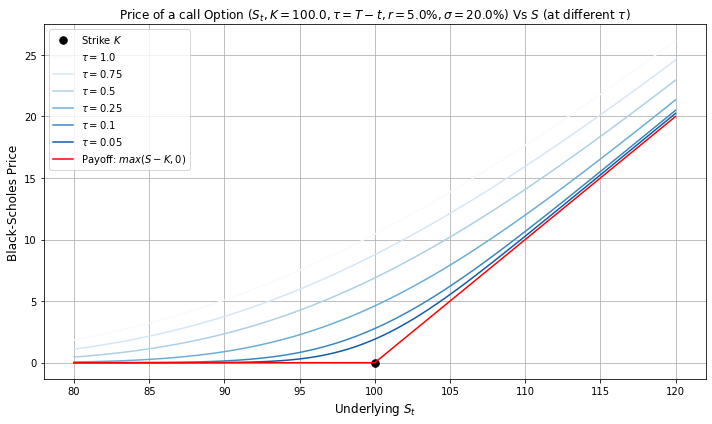

In [128]:
plot_multi_tau(call, S_strip, tau_strip)

In [129]:
put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
put

PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

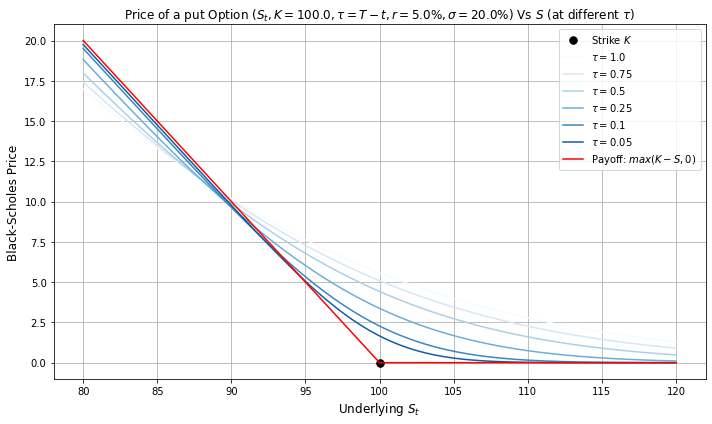

In [130]:
plot_multi_tau(put, S_strip, tau_strip)

## 4.1 _Focus on:_ effect of interest rates on options limits <a name="shortRateEffect"></a> 

As there are limits for call option prices, independently from the valuation model used to price the option, there are non-arbitrage arguments leading to upper and lower limits for the european put options as well. At any time $t \leq T$, the price $p_t$ of the put option satisfies:

$$
\max(K e^{-r \tau} - S_t, 0) \leq p_t \leq K e^{-r \tau}
$$

See, for example, [John C. Hull _Options, Futures and Other Derivatives_ (10th ed)](https://www.pearson.com/us/higher-education/program/Hull-Options-Futures-and-Other-Derivatives-10th-Edition/PGM333301.html) chapter 11.3.

In [131]:
def plot_single_tau(option, S_list, tau):
    """
    plot_single_tau(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau (float):                 time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=option.get_docstring('price_upper_limit'))
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=option.get_docstring('price_lower_limit'))
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.get_type(), option.get_K(), option.get_tau(), option.get_r()*100, option.get_sigma()*100), 
                 fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [132]:
call_focus = PlainVanillaOption(option_type='call', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

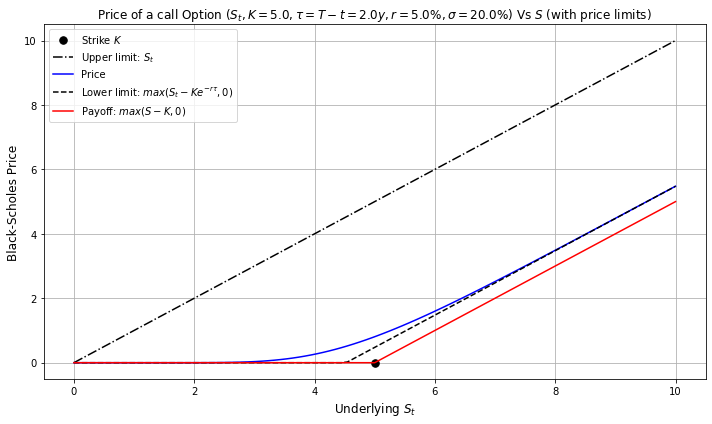

In [133]:
plot_single_tau(call_focus, S_strip_focus, call_focus.get_tau())

Here is a focus on the price limits of put options

In [134]:
put_focus = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

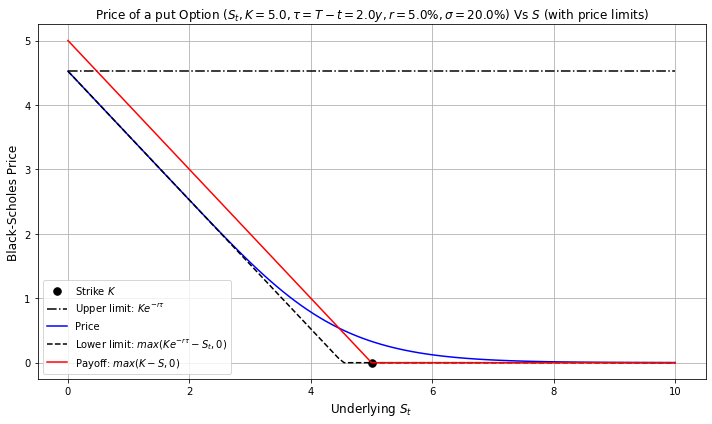

In [135]:
plot_single_tau(put_focus, S_strip_focus, put_focus.get_tau())

Notice how the price of the put can become smaller than its own payoff. This cross is due to interest rates. In nowadays scenarios, rates are typically extremely low (when not negative). Let's see that the crossing disappears for $r=0$

In [136]:
put_focus_zero_rates = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.0, sigma=0.2)

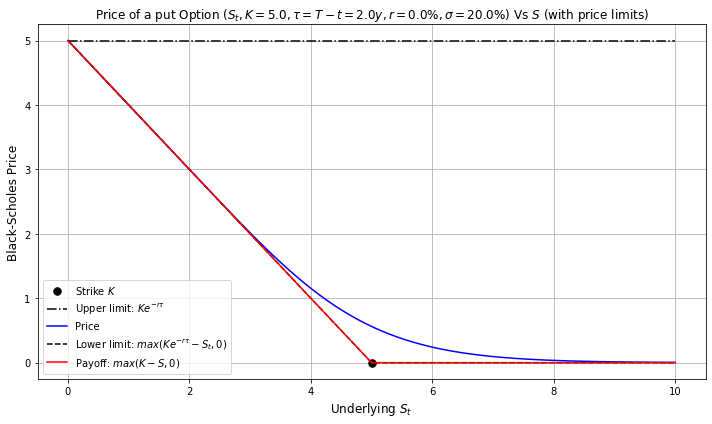

In [137]:
plot_single_tau(put_focus_zero_rates, S_strip_focus, put_focus_zero_rates.get_tau())

And nothing prevents us to consider even negative rates, as is common nowdays. Let's use a unrealistic $r = -5\%$ just to magnify the result graphically.

In [138]:
put_focus_negative_rates = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=-0.05, sigma=0.2)

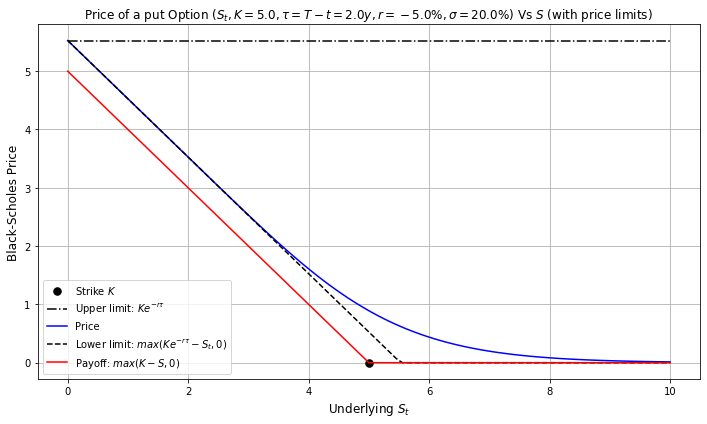

In [139]:
plot_single_tau(put_focus_negative_rates, S_strip_focus, put_focus_negative_rates.get_tau())